In [1]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/11/6f/419545a6a344cfd1358a80c36a06431881d607830483ef63d7c38905cd22/xgboost-2.0.1-py3-none-win_amd64.whl.metadata
Using cached xgboost-2.0.1-py3-none-win_amd64.whl (99.7 MB)


In [2]:
import torch
import numpy as np
import pandas as pd
import os
import sys

In [25]:
import time

In [2]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

In [38]:
import matplotlib.pyplot as plt 

In [3]:
from torch.utils.data import TensorDataset, DataLoader

In [4]:
import torch.nn as nn
from torch import optim

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import StandardScaler

In [9]:
import xgboost as xgb

In [18]:
from xgboost import XGBClassifier

## Load in the data

In [10]:
data = pd.read_csv('../data/gesture-recognition-and-biometrics-electromyogram-grabmyo-1.0.2/features_split.csv')

In [11]:
data.head()

,Unnamed: 0,session,participant,gesture,index,iemg,mav,ssi,myopulse,wflen,...,kurtosis_f_w3,kurtosis_f_w4,kurtosis_f_w5,kurtosis_f_w6,kurtosis_f_w7,kurtosis_f_w8,kurtosis_f_w9,kurtosis_f_w10,kurtosis_f_w11,kurtosis_f_w12
0,0,1,1,10,0,11996.863087,0.041842,997.135823,6.224512,8143.485828,...,61.940683,116.130710,31.371157,107.176549,64.459302,241.232060,54.880235,56.951175,42.644289,118.918727
1,1,1,1,10,0,10550.150337,0.036796,1019.627142,6.443555,6646.721181,...,160.171639,87.566832,154.616093,280.595181,160.756112,98.589493,135.655396,194.396727,294.858908,537.374741
2,2,1,1,10,0,9230.366582,0.032193,630.013233,6.033789,6023.438546,...,195.666850,90.568034,94.299202,276.105575,101.698579,49.607516,150.348389,151.177847,156.860637,115.905382
3,3,1,1,10,0,15949.504704,0.055627,1995.234560,4.999609,9318.559036,...,33.886272,80.377706,46.373047,64.445165,31.711430,33.328942,50.491362,81.876212,69.070232,142.723324
4,4,1,1,10,0,15936.956936,0.055584,1830.412922,5.870117,10476.465579,...,48.630658,39.722917,25.079065,84.877336,29.229362,48.843301,44.917769,39.354396,78.705208,176.820713


In [12]:
data.columns

Index(['Unnamed: 0', 'session', 'participant', 'gesture', 'index', 'iemg',
       'mav', 'ssi', 'myopulse', 'wflen',
       ...
       'kurtosis_f_w3', 'kurtosis_f_w4', 'kurtosis_f_w5', 'kurtosis_f_w6',
       'kurtosis_f_w7', 'kurtosis_f_w8', 'kurtosis_f_w9', 'kurtosis_f_w10',
       'kurtosis_f_w11', 'kurtosis_f_w12'],
      dtype='object', length=573)

In [13]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [42]:
X = data.iloc[:, 4:].values
Y = (data.iloc[:, 2]-1).values

In [43]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=6483)

In [45]:
feature_names = data.columns[4:]

In [46]:
feature_names

Index(['iemg', 'mav', 'ssi', 'myopulse', 'wflen', 'diffvar', 'dasd',
       'willison', 'power_f1', 'power_f2',
       ...
       'kurtosis_f_w3', 'kurtosis_f_w4', 'kurtosis_f_w5', 'kurtosis_f_w6',
       'kurtosis_f_w7', 'kurtosis_f_w8', 'kurtosis_f_w9', 'kurtosis_f_w10',
       'kurtosis_f_w11', 'kurtosis_f_w12'],
      dtype='object', length=568)

In [47]:
cls = XGBClassifier(n_jobs = 6)

In [48]:
start = time.time()
cls.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_test, y_test)], early_stopping_rounds=10, verbose=True)
print(f"Time taken: {time.time() - start}")

C:\Users\tanma\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.87033	validation_1-mlogloss:2.10105
[1]	validation_0-mlogloss:1.53539	validation_1-mlogloss:1.86448
[2]	validation_0-mlogloss:1.29754	validation_1-mlogloss:1.68959
[3]	validation_0-mlogloss:1.11625	validation_1-mlogloss:1.55571
[4]	validation_0-mlogloss:0.96812	validation_1-mlogloss:1.45245
[5]	validation_0-mlogloss:0.84725	validation_1-mlogloss:1.36566
[6]	validation_0-mlogloss:0.74662	validation_1-mlogloss:1.29138
[7]	validation_0-mlogloss:0.66389	validation_1-mlogloss:1.22694
[8]	validation_0-mlogloss:0.59150	validation_1-mlogloss:1.17293
[9]	validation_0-mlogloss:0.52909	validation_1-mlogloss:1.12439
[10]	validation_0-mlogloss:0.47325	validation_1-mlogloss:1.08221
[11]	validation_0-mlogloss:0.42715	validation_1-mlogloss:1.04319
[12]	validation_0-mlogloss:0.38687	validation_1-mlogloss:1.01224
[13]	validation_0-mlogloss:0.35097	validation_1-mlogloss:0.98317
[14]	validation_0-mlogloss:0.31860	validation_1-mlogloss:0.95739
[15]	validation_0-mlogloss:0.28909	

## Check Result

In [49]:
y_pred = cls.predict(x_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.62      0.65       176
           1       0.70      0.78      0.74       188
           2       0.80      0.79      0.79       182
           3       0.77      0.68      0.72       195
           4       0.78      0.81      0.79       177
           5       0.86      0.81      0.83       171
           6       0.69      0.77      0.73       180
           7       0.88      0.83      0.85       186
           8       0.77      0.73      0.75       192
           9       0.83      0.80      0.82       209
          10       0.89      0.95      0.92       170
          11       0.92      0.89      0.91       179
          12       0.87      0.88      0.87       185
          13       0.90      0.89      0.89       173
          14       0.80      0.90      0.85       155
          15       0.72      0.71      0.71       174
          16       0.97      0.99      0.98       179

    accuracy              

In [50]:
cls.feature_importances_.shape

(568,)

In [51]:
fi_df = pd.DataFrame({"name": feature_names, "values": cls.feature_importances_})

In [52]:
fi_df

,name,values
0,iemg,0.003313
1,mav,0.000000
2,ssi,0.002291
3,myopulse,0.004366
4,wflen,0.130241
...,...,...
563,kurtosis_f_w8,0.000000
564,kurtosis_f_w9,0.000000
565,kurtosis_f_w10,0.000000
566,kurtosis_f_w11,0.000000


In [53]:
fi_df.sort_values(by = "values", ascending=False).head(30)

,name,values
4,wflen,0.130241
334,rms_w3,0.022068
22,power_f15,0.021282
262,min_f3,0.015149
133,skew_f14,0.012188
138,skew_w3,0.009369
128,skew_f9,0.009346
341,rms_w10,0.008319
27,power_w4,0.008283
146,skew_w11,0.007870


<AxesSubplot:xlabel='name'>

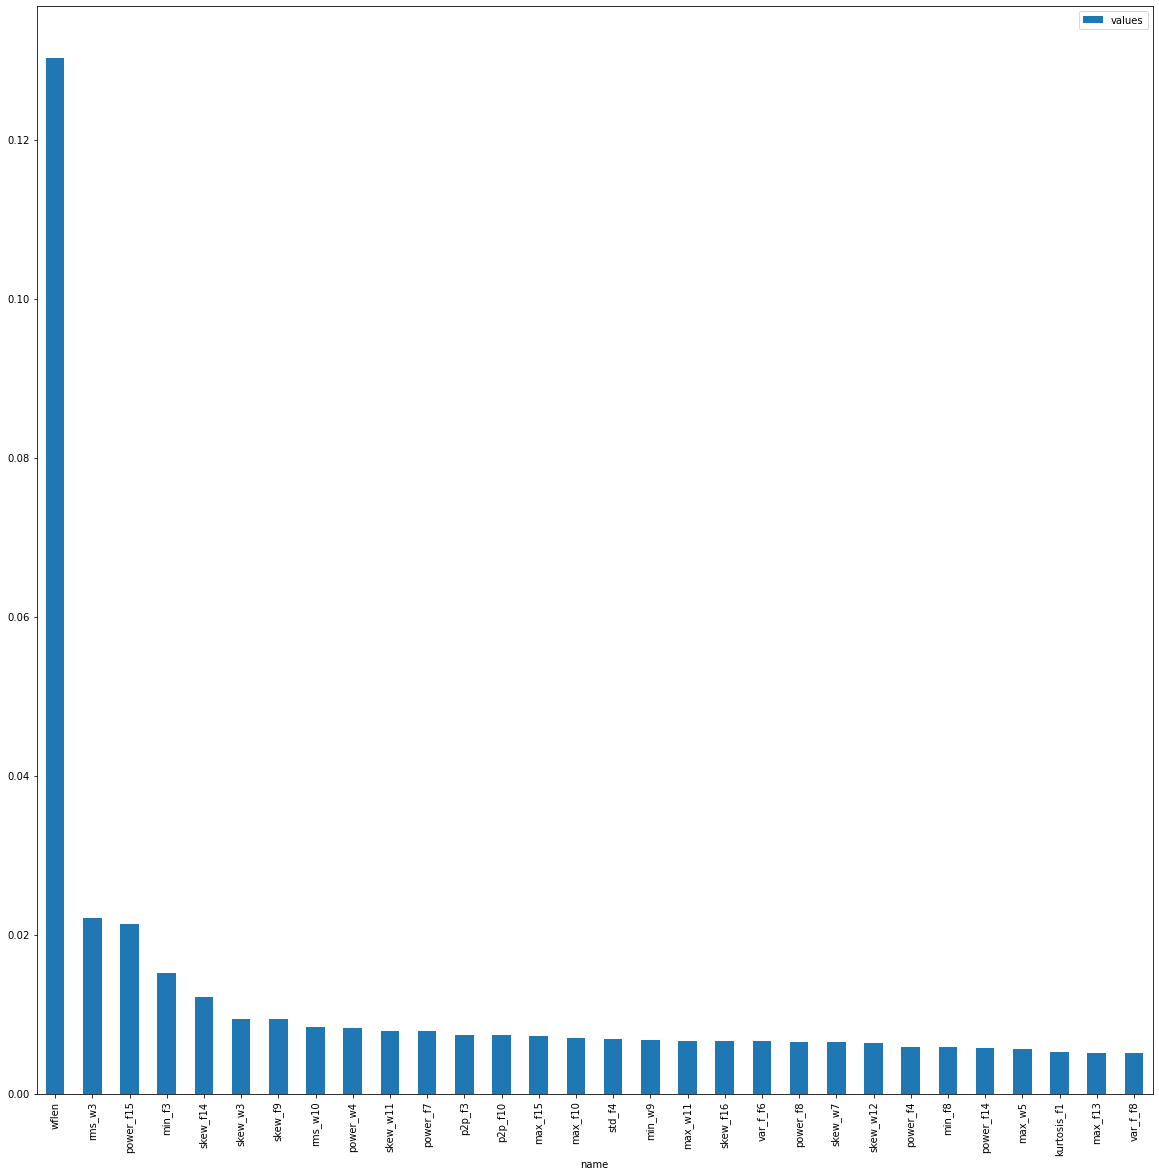

In [54]:

fi_df.sort_values(by = "values", ascending=False)[:30].plot.bar(x = "name", y = "values", figsize = (20,20))